In [1]:
import sys
import os

import cv2
import numpy as np
import openslide
from skimage.color import rgb2hsv
from skimage.filters import threshold_otsu
from scipy import ndimage
import matplotlib.pyplot as plt
# import tslide

In [2]:
wsi_path = "2017-11-24 13_22_56.tif"
slide = openslide.OpenSlide(wsi_path)
level = slide.level_count - 1
#slide = tslide.TSlide(wsi_path)

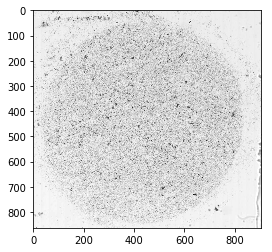

In [3]:
img_gray =cv2.cvtColor(np.array(slide.read_region((0, 0),
                       level,
                       slide.level_dimensions[level]).convert('RGB')), cv2.COLOR_RGB2GRAY)
                      
source = np.array(slide.read_region((0, 0),
                       level,
                       slide.level_dimensions[level]).convert('RGB'))
plt.imshow(img_gray, cmap="gray")

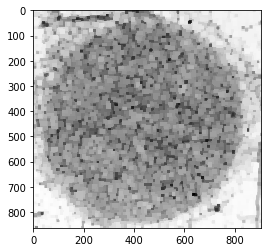

In [25]:
kernel_size = (5, 5)
kernel = np.ones(kernel_size, np.uint8)
img_open = cv2.morphologyEx(img_gray, cv2.MORPH_ERODE, kernel, iterations=5)
img_open = cv2.morphologyEx(img_open, cv2.MORPH_DILATE, kernel, iterations=3)
# img_open = cv2.morphologyEx(img_open, cv2.MORPH_ERODE, kernel, iterations=1)
plt.imshow(img_open, cmap="gray")

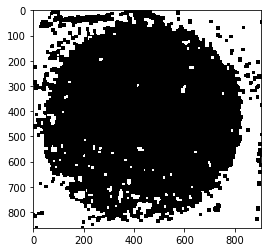

In [22]:
background = img_open > threshold_otsu(img_open)
tissue_mask = background
plt.imshow(tissue_mask, cmap="gray")

In [6]:
img, contours, hierarchy = cv2.findContours(tissue_mask.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

In [7]:
print(len(contours))

227


In [8]:
ori = source.copy()

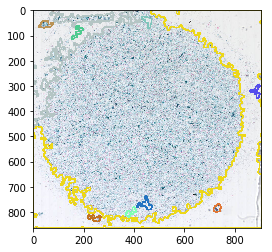

In [20]:
import random


# draw contours
source = ori.copy()

for i in range(10):
    cv2.drawContours(source, contours, i, color=(random.randint(0,255),random.randint(0,255),random.randint(0,255)), thickness=5)
plt.imshow(source)

In [ ]:
background = img_RGB > threshold_otsu(img_RGB)
tissue_mask = background
threshold_otsu(img_RGB)
plt.imshow(tissue_mask, cmap="gray")

In [ ]:
kernel_size = (5, 5)
kernel = np.ones(kernel_size, np.uint8)
img = np.array(tissue_mask * 255, dtype=np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)
plt.imshow(dilation, cmap="gray")

In [ ]:
erosion = cv2.erode(dilation,kernel,iterations = 5)
plt.imshow(erosion, cmap="gray")

In [ ]:
kernel = np.ones(kernel_size, np.uint8)
dilation = cv2.dilate(erosion,kernel,iterations = 1)
plt.imshow(dilation, cmap="gray")

In [ ]:
im2, contours, hierarchy = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

In [ ]:
# draw contours
cv2.drawContours(source, contours, 1, color=255, thickness=5)
plt.imshow(source)

In [ ]:
# find convex hull of contour
hull = cv2.convexHull(contours[1], False)
cv2.drawContours(source, [hull], 0, color=255, thickness=5)
plt.imshow(source)

In [ ]:
contour = contours[1]
(x,y),radius = cv2.minEnclosingCircle(contour)
center = (int(x),int(y))
radius = int(radius)
img = np.ones(tissue_mask.shape)
print(img.shape)
cv2.circle(img,center,radius, 0, -1)
#cv2.circle(img,center,radius//3*2,(255,0,0),30)
img = np.array((255 - img) / 255, dtype=np.uint8)
print("Center: {}; Radius: {}".format(center, radius))
# cv2.circle(img,center,3,(255,255,0),30)
# cv2.drawContours(img, [cnt], 0, (0,0,255), 30)
plt.imshow(img, cmap="gray")

In [ ]:
img4 = cv2.circle(source,center,radius,(255,0,0),30)
plt.imshow(img4, cmap="gray")

In [ ]:
cnt = contours[0]
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img = np.ones(tissue_mask.shape)
print(img.shape)
cv2.circle(img,center,radius//3*2, 0, -1)
#cv2.circle(img,center,radius//3*2,(255,0,0),30)
img = np.array((255 - img) / 255, dtype=np.uint8)
print("Center: {}; Radius: {}".format(center, radius))
# cv2.circle(img,center,3,(255,255,0),30)
# cv2.drawContours(img, [cnt], 0, (0,0,255), 30)
plt.imshow(img, cmap="gray")

In [ ]:
plt.imshow((img_RGB * img), cmap="gray")

In [ ]:
img3 = cv2.circle(source,center,radius//3*2,(255,0,0),30)
plt.imshow(img3, cmap="gray")

In [ ]:
print(img_RGB.shape)
print(source.shape)

### maxpooling

In [45]:
def maxpooling(img, kernel_size=11):
    h, w = img.shape
    img_out = np.ones((h, w))
    window_size = kernel_size // 2
    for j in range(window_size, h-window_size):
        for i in range(window_size, w-window_size):
            img_out[j][i] = np.max(img[j-window_size:j+window_size, i-window_size:i+window_size])
    return img_out

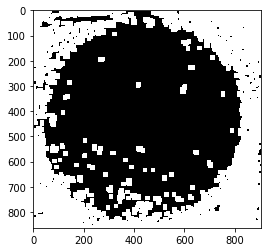

In [46]:
img_out = maxpooling(tissue_mask)
plt.imshow(img_out, cmap="gray")

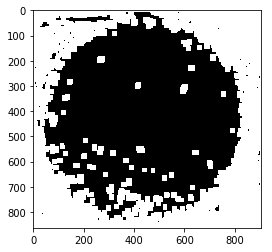

In [47]:
img_out = maxpooling(img_out, kernel_size=5)
plt.imshow(img_out, cmap="gray")

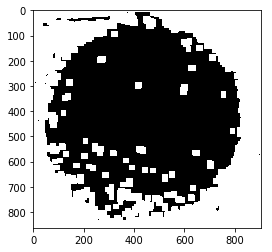

In [48]:
img_out = maxpooling(img_out, kernel_size=5)
plt.imshow(img_out, cmap="gray")

In [49]:
img, contours, hierarchy = cv2.findContours(img_out.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)
print(len(contours))

59


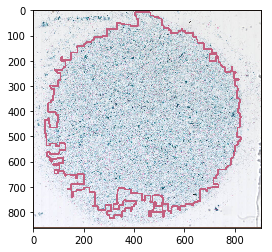

In [53]:
import random


# draw contours
source = ori.copy()

for i in range(2):
    cv2.drawContours(source, contours, i, color=(random.randint(0,255),random.randint(0,255),random.randint(0,255)), thickness=5)
plt.imshow(source)

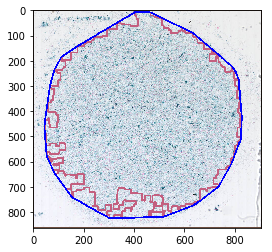

In [55]:
hull = cv2.convexHull(contours[1], False)

cv2.drawContours(source, [hull], 0, (0,0,255), 5)
plt.imshow(source)

### Use circled area as input, find contour again